# 17.Skl_rf

Skit-Learn은 엔트로피와 지니인덱스 의 불순도 계산 방법만 지원한다

랜덤 포레스트는 배깅 샘플링 방법을 적용한 의사결정 트리의 한 형태이다.
또한 여러개의 의사결정 트리가 합쳐져서 앙상블 모델이라고 볼 수 있다.

랜덤 포레스트이 학습 원리
1. 주어진 트레이닝 데이터 셋트에서 무작위로 중복을 허용해서 n개를 선택한다. (중복 허용 : 배깅 방법)
2. 선택한 n개의 데이터 샘플에서 데이터 특성값(아이리스 데이터의 경우, 꽃잎너비, 꽃잎길이 등이 데이터 특성값임)을 중복 허용 없이 d개 선택한다.
3. 이를 이용해 의사결정트리를 학습하고 생성한다.
4. 1~3 단계를 k번 반복한다.
5. 1~4 단계를 통해 생성된 k개의 의사결정트리를 이용해 예측하고, 예측된 결과의 평균이나 가장 많이 등장한 예측 결과를 선택하여 최종 예측값으로 결정한다.

1 단계에서 무작위로 중복을 허용해서 선택한 n개의 데이터를 선택하는 과정을 부트스트랩(Boostrap) 이라 부르며, 부트스트랩으로 추출된 n개의 데이터를 부트스트랩 샘플이라 부른다. scikit-leanr이 제공하는 랜덤 포레스트 api는 부트스트랩 샘플의 크기 n의 값으로 원래 트레이닝 데이터 전체 개수와 동일한 수를 할당한다.

2 단계에서는 d값으로는 보통 주어진 트레이닝 데이터의 전체 특성의 개수의 제곱근으로 주어진다. 즉 트레이닝 데이터의 전체 특성의 개수를 m이라고 하면 d값은 루트엠 이다.

5 단계에서 여러개의 의사결정트리로부터 나온 예측 결과들의 평균이나 다수의 예측 결과를 이용하는 방법을 앙상블 기법 이라고 한다. 다수의 예측 결과를 선택하는 것은 다수결의 원칙과 비슷하여 Majority Voting (다수 투표) 라고 부른다.

부트스트랩을 이용해 무작위 의사결정트리의 집합인 랜덤 포레스트를 구성하는 것처럼, 부트스트랩으로 다양한 분류기에 대해 앙상블 기법을 활용하여 특징적인 하나의 분류기로 구성하는 것을 배깅 이라 부른다. Baggiing 은 Bootstrap Aggregating의 약자이다.

총 테스트 개수 : 45, 오류개수 : 2
정확도: 0.96


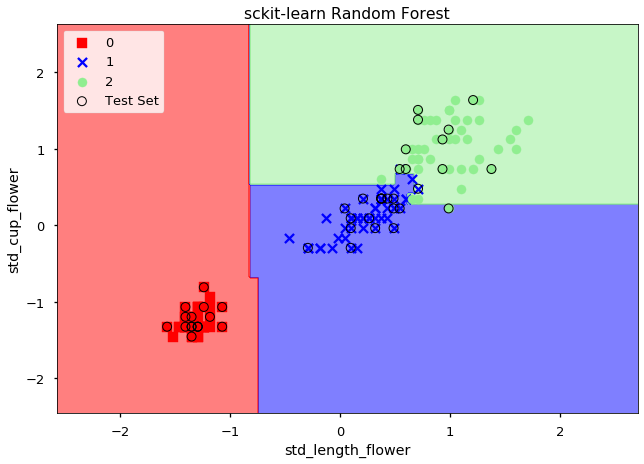

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from matplotlib import style
from plotdregion import plot_decision_region
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

style.use('seaborn-talk')

if __name__ == '__main__':
    iris = datasets.load_iris()
    X = iris.data[:,[2,3]]
    y = iris.target
     
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    sc = StandardScaler()
    sc.fit(X_train) # X_train의 평균과 표준편차를 구함
    X_train_std = sc.transform(X_train) # 트레이닝 데이터를 표준화
    X_test_std = sc.transform(X_test) # 테스트 데이터를 표준화
    
    #ml = Perceptron(eta0=0.01, max_iter=40, random_state=0)
    #ml = LogisticRegression(C=1000.0, random_state=0)
    #ml = SVC(kernel='linear', C=1.0, random_state=0)
    #ml = SVC(kernel='rbf', C=10.0, gamma=0.10, random_state=0) #비선형 모델 적용 SVM
    #ml = SGDClassifier(loss='perceptron') #확률적 경사하강법 적용 퍼셉트론
    #ml = SGDClassfier(loss='log') #확률적 경사하강법 적용 로지스틱 회귀
    #ml = SGDClassfier(loss='hinge') #확률적 경사하강법 적용 SVM
    
    #ml = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
    # 위코드의 의미는 불순도를 엔트로피로 한다는 뜻이다.
    # Gini index 는 'gini' 를 입력 하도록 하자
    ml = RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=2, random_state=1)
    
    ml.fit(X_train_std, y_train)
    y_pred = ml.predict(X_test_std)
    print('총 테스트 개수 : %d, 오류개수 : %d' %(len(y_test), (y_test != y_pred).sum()))
    print('정확도: %.2f' %accuracy_score(y_test, y_pred))
    
    X_combined_std = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))
    plot_decision_region(X=X_combined_std, y=y_combined, classifier=ml, test_idx=range(105,150), title='sckit-learn Random Forest')